# Random Walk as Price Action
In this notebook, we will simulate random price sets and apply a grid trading strategy to identify the best parameters for maximizing returns. We will:

1. Generate daily returns using a Gaussian distribution with varying means and standard deviations.
2. Calculate cumulative returns and simulate price movements.
3. Apply a grid trading strategy to the simulated prices.
4. Evaluate the performance of the strategy by analyzing the number of closed and open positions.
5. Identify the best and worst performing parameter sets.
6. Visualize the results and save the data for further analysis.

By the end of this notebook, we aim to understand how different parameters affect the performance of a grid trading strategy and identify the optimal settings for maximizing returns.

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [164]:
# 1. Define the mean and std matrix for the Gaussian distrubution of the daily returns percentage

means = np.linspace(-5, 5, 20)
stds = np.linspace(0.2, 5, 20)

# 2. Define the number of days to simulate

days = 360

# 3. Simulate the daily returns

daily_returns = np.array([ [np.random.normal(mean, std, days) / 100 + 1 for mean in means] for std in stds]) #Dsm = 20x20x252 matrix s for std and m for mean

print(daily_returns)


[[[0.95150523 0.95151764 0.95066233 ... 0.94854537 0.94799552 0.95094417]
  [0.95860947 0.95756255 0.95615591 ... 0.95649158 0.95443366 0.9561965 ]
  [0.95931743 0.95974821 0.96175339 ... 0.96010203 0.95926455 0.96111494]
  ...
  [1.03798456 1.03872746 1.03731082 ... 1.0393953  1.03944151 1.04153289]
  [1.04102203 1.04686706 1.04733225 ... 1.03944293 1.04544036 1.04650583]
  [1.05129526 1.05065528 1.04908119 ... 1.05263474 1.04757519 1.0528729 ]]

 [[0.94519623 0.94904516 0.94860856 ... 0.94713571 0.95429512 0.95539661]
  [0.95332495 0.95790706 0.95638709 ... 0.95124242 0.95304809 0.96110972]
  [0.9600997  0.95440907 0.95814899 ... 0.95895771 0.97032673 0.96428698]
  ...
  [1.03938563 1.03824284 1.03957203 ... 1.03696185 1.04054907 1.04580767]
  [1.04957799 1.04216247 1.0496363  ... 1.0441156  1.05044766 1.04427309]
  [1.04910004 1.04744845 1.05051806 ... 1.04965852 1.05387461 1.04216126]]

 [[0.94599783 0.94318122 0.9567492  ... 0.95269724 0.93945524 0.9454723 ]
  [0.95729686 0.955822

In [165]:

# 4. Calculate the cumulative returns

cumulative_returns = np.array([[np.cumprod(daily_returns[s, m]) for m in range(20) ] for s in range(20)]) #Dsm = 20x20x252 matrix s for std and m for mean

print(cumulative_returns)
# 5. Calculate the price and round it to integers
price = 100 * cumulative_returns
price = price.round(0)

#print(price)

[[[9.51505225e-01 9.05374007e-01 8.60704963e-01 ... 1.03059126e-08
   9.76995896e-09 9.29068554e-09]
  [9.58609468e-01 9.17928531e-01 8.77682794e-01 ... 7.99851946e-08
   7.63405618e-08 7.29965782e-08]
  [9.59317432e-01 9.20703188e-01 8.85489414e-01 ... 5.57541363e-07
   5.34829663e-07 5.14032778e-07]
  ...
  [1.03798456e+00 1.07818307e+00 1.11841096e+00 ... 1.03802566e+06
   1.07896696e+06 1.12377958e+06]
  [1.04102203e+00 1.08981167e+00 1.14139490e+00 ... 6.65916370e+06
   6.96175851e+06 7.28552085e+06]
  [1.05129526e+00 1.10454892e+00 1.15876149e+00 ... 4.03858315e+07
   4.23071950e+07 4.45440991e+07]]

 [[9.45196233e-01 8.97033910e-01 8.50934048e-01 ... 1.22706450e-08
   1.17098167e-08 1.11875191e-08]
  [9.53324948e-01 9.13196702e-01 8.73369538e-01 ... 6.71065760e-08
   6.39557942e-08 6.14685354e-08]
  [9.60099700e-01 9.16327860e-01 8.77978609e-01 ... 5.14523747e-07
   4.99256146e-07 4.81426202e-07]
  ...
  [1.03938563e+00 1.07913469e+00 1.12183825e+00 ... 1.14306303e+06
   1.18941

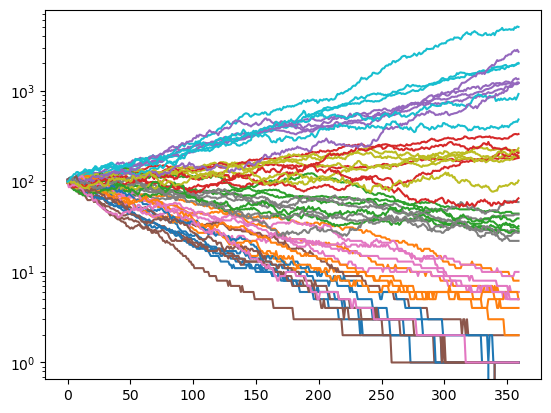

In [166]:
# 6. Plot the prices in log scale

for s in range(5, 15):
    for m in range(7, 12):
        plt.plot(price[s, m], label=f"mean={means[m]}, std={stds[s]}")

plt.yscale('log')
plt.show()


In [167]:
#Now we need to create a function that takes a data_set and returns how much return it would have if it used grid strategy

# TODO: Enhance the function apply_grid to return the final balance of the strategy and work on smaller grids

def apply_grid(x, grid_percentage):
    current_low = 100 * (1 - (grid_percentage / 100))
    current_high = 100 * (1 + (grid_percentage / 100))
    
    open_positions = 0
    closed_positions = 0
    
    for i in range(1, len(x)):
        current_price = x[i]
        # if current price is lower than current_low, buy
        if current_price < current_low:
            open_positions += 1
            current_low = current_low * (1 - (grid_percentage / 100))
            current_high = current_high * (1 - (grid_percentage / 100))
            
        # if current price is higher than current_high, sell
        elif current_price > current_high and open_positions > 0:
            open_positions -= 1
            closed_positions += 1
            current_low = current_low * (1 + (grid_percentage / 100))
            current_high = current_high * (1 + (grid_percentage / 100))
    
    return closed_positions, open_positions
        
    

In [168]:


# 7. Apply the grid strategy to the price matrix and list the results

grid_percentage = 10   # 10% grid
results = np.array([[apply_grid(price[s, m], grid_percentage) for m in range(20)] for s in range(20)]) #Dsm = 20x20x252 matrix s for std and m for mean

# 8. Print the results and create an excel file with the results with headers: mean, std, closed_positions, open_positions
print(results)

# Prepare data for the DataFrame
data = []
for s in range(20):
    for m in range(20):
        closed_positions, open_positions = results[s, m]
        data.append([means[m], stds[s], closed_positions, open_positions])

# Create DataFrame
df_results = pd.DataFrame(data, columns=['mean', 'std', 'closed_positions', 'open_positions'])

# Save to Excel
df_results.to_excel('grid_strategy_results.xlsx', index=False)


[[[  0 300]
  [  0 287]
  [  0 272]
  [  0 251]
  [  0 225]
  [  0 184]
  [  0 117]
  [  0  43]
  [  0  26]
  [  0   9]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0 300]
  [  0 289]
  [  0 272]
  [  0 249]
  [  0 219]
  [  0 176]
  [  0 119]
  [  0  43]
  [  0  26]
  [  0   8]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0 301]
  [  0 286]
  [  0 271]
  [  0 249]
  [  0 221]
  [  0 176]
  [  0 123]
  [  0  43]
  [  0  26]
  [  0  10]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0 299]
  [  0 289]
  [  0 269]
  [  0 247]
  [  0 225]
  [  0 186]
  [  0 120]
  [  0  43]
  [  0  25]
  [  0   8]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0 301]
  [  0 282]
  [  0 2

Best results average mean: -0.5789473684210529, average std: 4.242105263157895


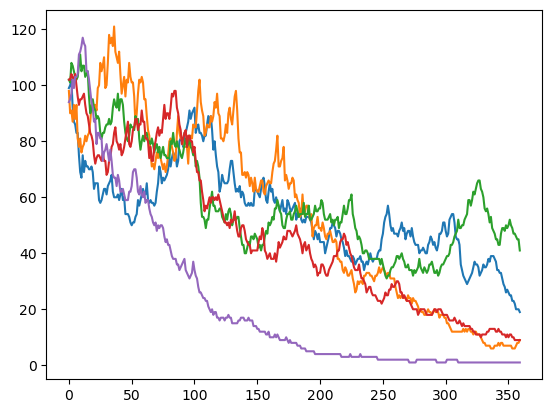

In [169]:
# Plot the prices for the best and worst results, best results are the ones with highes closed_positions/open_positions ratio

best_results = df_results.sort_values('closed_positions', ascending=False).head(5)

best_prices = [price[np.where(stds == std)[0][0] , np.where(means == mean)[0][0] ] for mean, std in zip(best_results['mean'], best_results['std'])]



#print(best_prices)

for p in best_prices:
    plt.plot(p, label='Best results')
    
    
best_result_avg_mean = best_results['mean'].mean()
best_result_avg_std = best_results['std'].mean()
print(f"Best results average mean: {best_result_avg_mean}, average std: {best_result_avg_std}")
    